In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("churn.csv")
df.head()

Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
0           1  8260-NGFNY    One  Month-to-month               No   
1           2  2359-QWQUL     39        One year              Yes   
2           3  6598/RFFVI      2        One year               No   
3           4  IXSTS-8780      6  Month-to-month              Yes   
4           5  2674/MIAHT   Four  Month-to-month              Yes   

             PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0             Mailed check            25.2         25.20  Female   
1  Credit card (automatic)           104.7       4134.85  Female   
2  Credit card (automatic)            19.3         28.30    Male   
3         Electronic check            90.1        521.30  Female   
4             Mailed check            80.3        324.20  Female   

   SeniorCitizen  ... PhoneService     MultipleLines InternetService  \
0            0.0  ...           No  No phone service             DSL   
1            0.0  ...          Yes                No     Fiber optic   
2            0.0  ...          Yes                No              No   
3            0.0  ...          Yes               Yes     Fiber optic   
4            0.0  ...          Yes               Yes     Fiber optic   

        OnlineSecurity         OnlineBackup     DeviceProtection  \
0                   No                   No                   No   
1                  Yes                   No                  Yes   
2  No internet service  No internet service  No internet service   
3                   No                  Yes                   No   
4                   No                  Yes                   No   

           TechSupport          StreamingTV      StreamingMovies Churn  
0                   No                   No                   No   Yes  
1                  Yes                  Yes                  Yes   Yes  
2  No internet service  No internet service  No internet service   Yes  
3                   No                  Yes                   No   Yes  
4                   No                   No                   No    No  

[5 rows x 22 columns]

In [2]:
df=df.drop(['customerID','PaymentMethod','gender' ], axis=1)
df.head()

Unnamed: 0 tenure        Contract PaperlessBilling  MonthlyCharges  \
0           1    One  Month-to-month               No            25.2   
1           2     39        One year              Yes           104.7   
2           3      2        One year               No            19.3   
3           4      6  Month-to-month              Yes            90.1   
4           5   Four  Month-to-month              Yes            80.3   

   TotalCharges  SeniorCitizen Partner Dependents PhoneService  \
0         25.20            0.0      No         No           No   
1       4134.85            0.0     Yes         No          Yes   
2         28.30            0.0      No         No          Yes   
3        521.30            0.0      No         No          Yes   
4        324.20            0.0      No         No          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0  No phone service             DSL                   No                   No   
1                No     Fiber optic                  Yes                   No   
2                No              No  No internet service  No internet service   
3               Yes     Fiber optic                   No                  Yes   
4               Yes     Fiber optic                   No                  Yes   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1                  Yes                  Yes                  Yes   
2  No internet service  No internet service  No internet service   
3                   No                   No                  Yes   
4                   No                   No                   No   

       StreamingMovies Churn  
0                   No   Yes  
1                  Yes   Yes  
2  No internet service   Yes  
3                   No   Yes  
4                   No    No

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        257 non-null    int64  
 1   tenure            257 non-null    object 
 2   Contract          257 non-null    object 
 3   PaperlessBilling  257 non-null    object 
 4   MonthlyCharges    247 non-null    float64
 5   TotalCharges      242 non-null    float64
 6   SeniorCitizen     252 non-null    float64
 7   Partner           257 non-null    object 
 8   Dependents        257 non-null    object 
 9   PhoneService      257 non-null    object 
 10  MultipleLines     257 non-null    object 
 11  InternetService   257 non-null    object 
 12  OnlineSecurity    257 non-null    object 
 13  OnlineBackup      257 non-null    object 
 14  DeviceProtection  257 non-null    object 
 15  TechSupport       257 non-null    object 
 16  StreamingTV       257 non-null    object 
 1

Unnamed: 0  MonthlyCharges  TotalCharges  SeniorCitizen
count  257.000000      247.000000    242.000000     252.000000
mean   129.000000       62.473482   2267.953719       0.134921
std     74.333707       31.126525   2270.876564       0.342319
min      1.000000        3.500000     18.850000       0.000000
25%     65.000000       25.700000    450.687500       0.000000
50%    129.000000       70.300000   1313.025000       0.000000
75%    193.000000       88.325000   3691.187500       0.000000
max    257.000000      115.100000   8337.450000       1.000000

In [4]:
df.isna().sum()
df.columns

Index(['Unnamed: 0', 'tenure', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [6]:
numcols = ['DeviceProtection', 'InternetService', 'OnlineBackup' ]
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x='Churn', y=i, data=df, ax=subplot)

plt.tight_layout ()
plt.show()

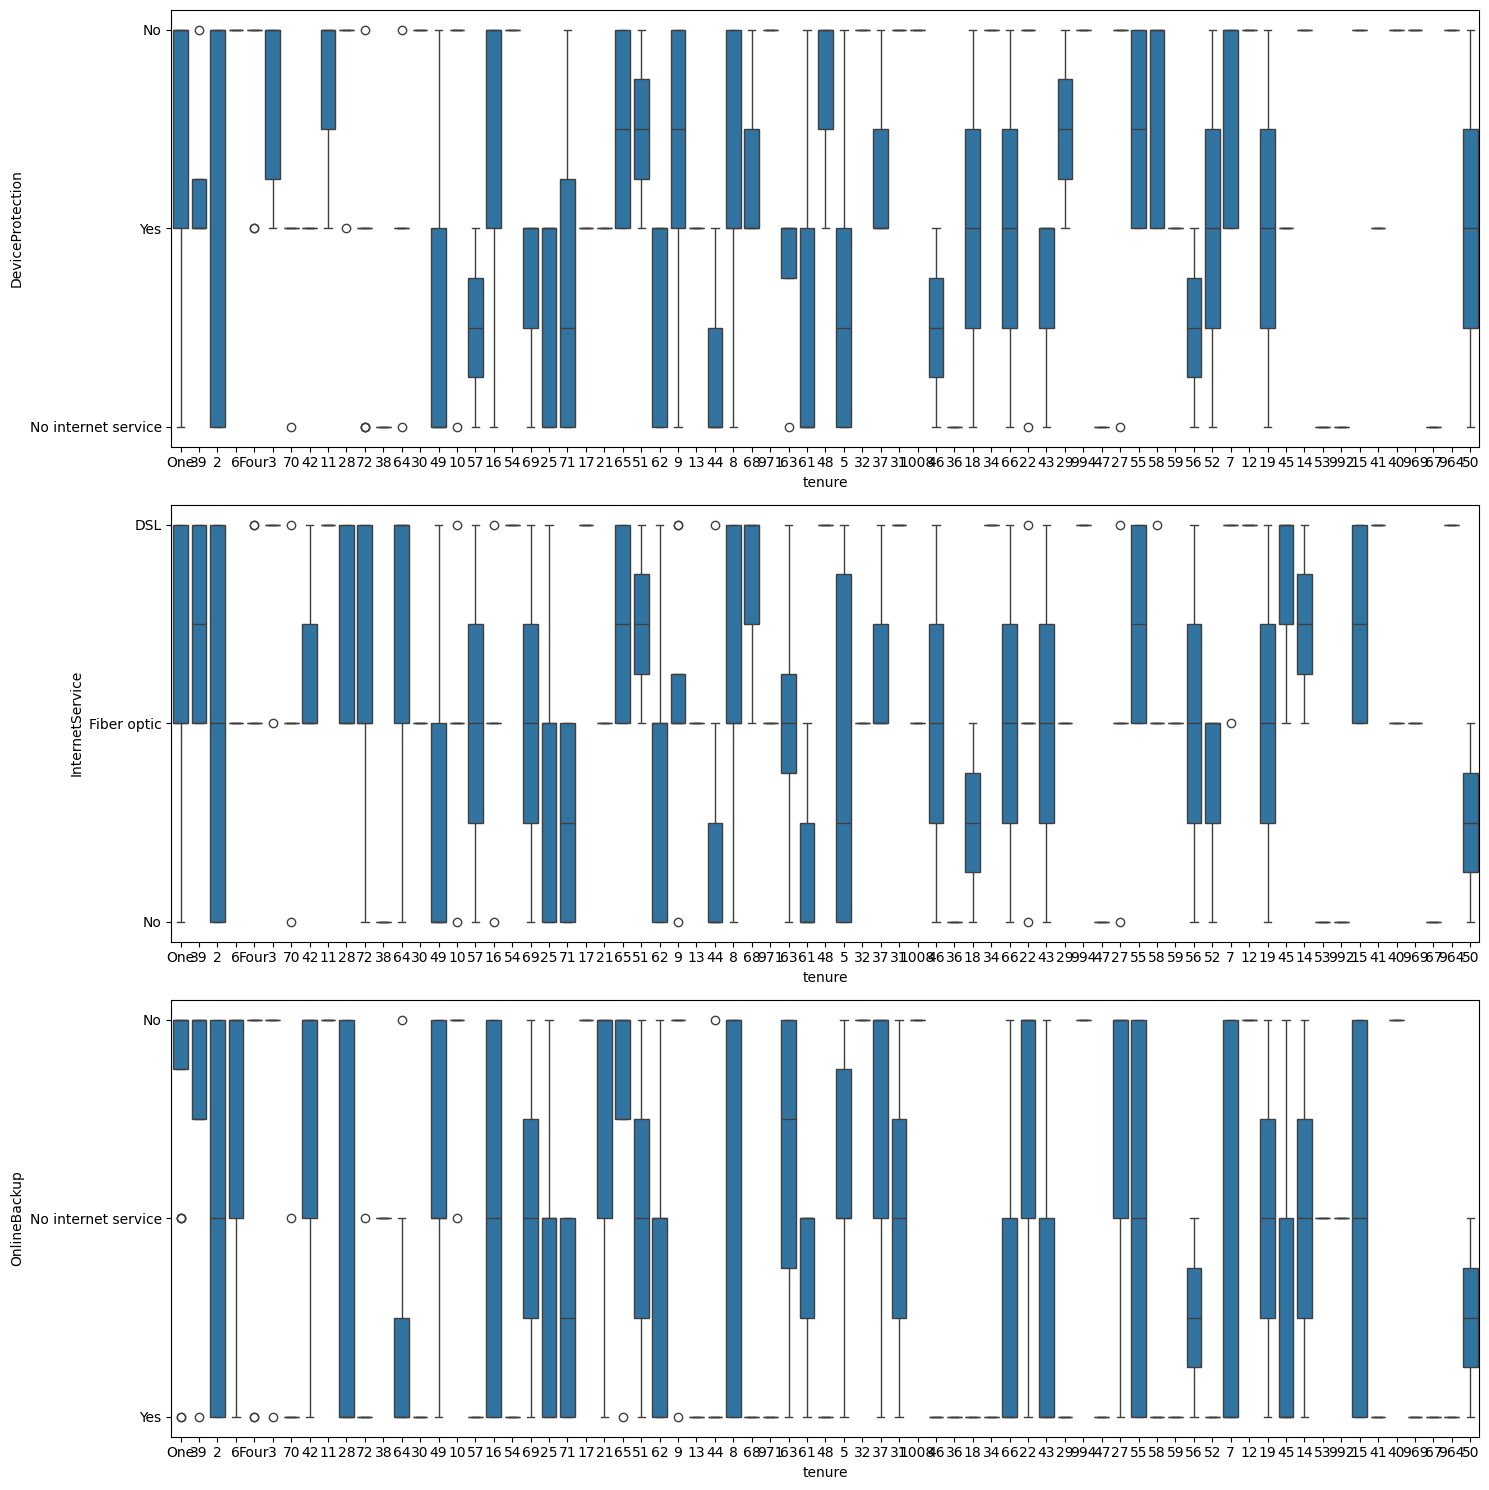

In [7]:
for col in numcols:
    df[col] = df[col].astype(str)

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x='tenure', y=i, data=df, ax=subplot)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['Partner']=le.fit_transform(df['Partner'])
le.classes_
df.head()

Unnamed: 0 tenure        Contract PaperlessBilling  MonthlyCharges  \
0           1    One  Month-to-month               No            25.2   
1           2     39        One year              Yes           104.7   
2           3      2        One year               No            19.3   
3           4      6  Month-to-month              Yes            90.1   
4           5   Four  Month-to-month              Yes            80.3   

   TotalCharges  SeniorCitizen  Partner Dependents PhoneService  \
0         25.20            0.0        0         No           No   
1       4134.85            0.0        1         No          Yes   
2         28.30            0.0        0         No          Yes   
3        521.30            0.0        0         No          Yes   
4        324.20            0.0        0         No          Yes   

   MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0              1             DSL                   No                   No   
1              0     Fiber optic                  Yes                   No   
2              0              No  No internet service  No internet service   
3              2     Fiber optic                   No                  Yes   
4              2     Fiber optic                   No                  Yes   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1                  Yes                  Yes                  Yes   
2  No internet service  No internet service  No internet service   
3                   No                   No                  Yes   
4                   No                   No                   No   

       StreamingMovies Churn  
0                   No   Yes  
1                  Yes   Yes  
2  No internet service   Yes  
3                   No   Yes  
4                   No    No

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
dtree=DecisionTreeClassifier()
df.head()

Unnamed: 0 tenure        Contract PaperlessBilling  MonthlyCharges  \
0           1    One  Month-to-month               No            25.2   
1           2     39        One year              Yes           104.7   
2           3      2        One year               No            19.3   
3           4      6  Month-to-month              Yes            90.1   
4           5   Four  Month-to-month              Yes            80.3   

   TotalCharges  SeniorCitizen  Partner Dependents PhoneService  \
0         25.20            0.0        0         No           No   
1       4134.85            0.0        1         No          Yes   
2         28.30            0.0        0         No          Yes   
3        521.30            0.0        0         No          Yes   
4        324.20            0.0        0         No          Yes   

   MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0              1             DSL                   No                   No   
1              0     Fiber optic                  Yes                   No   
2              0              No  No internet service  No internet service   
3              2     Fiber optic                   No                  Yes   
4              2     Fiber optic                   No                  Yes   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1                  Yes                  Yes                  Yes   
2  No internet service  No internet service  No internet service   
3                   No                   No                  Yes   
4                   No                   No                   No   

       StreamingMovies Churn  
0                   No   Yes  
1                  Yes   Yes  
2  No internet service   Yes  
3                   No   Yes  
4                   No    No

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['TechSupport'])
X = df.drop('TechSupport', axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
print(f"Classification Report:\n{classification_report(y_test, dtree_predict)}")
print(f"Accuracy (Test set): {accuracy_score(y_test, dtree_predict):.2f}")
f1 = f1_score(y_test, dtree_predict, average='weighted')
print(f"F1-Score (Test set): {f1:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       1.00      1.00      1.00        20
           2       0.63      0.52      0.57        23

    accuracy                           0.77        78
   macro avg       0.78      0.77      0.78        78
weighted avg       0.76      0.77      0.76        78

Accuracy (Test set): 0.77
F1-Score (Test set): 0.76
